In [ ]:
import numpy as np
from biom.table import Table
from biom import load_table
import pandas as pd

In [ ]:
# t = load_table("/Volumes/TBHD/Valencia/Microbiome_Analysis/Nephele_cloud_play_project/outputs/for_analyze_with_microbiomedb.biom")
# t = load_table("/Volumes/TBHD_share/valencia/3sample/no_merge_trim+trim_output/for_analyze_with_microbiomedb.biom")
# t = load_table("/Volumes/TBHD_share/valencia/3sample/batch2/wgsa2/outputs/for_analyze_with_microbiomedb.biom")
# t = load_table("/Volumes/TBHD_share/valencia/3sample/batch2/wgsa2/outputs/TAXprofiles/MAGs_TAX/MAG-based_Counts+TAX.biom")
# t = load_table("/Volumes/TBHD_share/walitt_sample/3sample/outputs/for_analyze_with_microbiomedb.biom")
t = load_table("/Volumes/TBHD_share/valencia/bmock12/NEPHELE/wgsa2/subset_bmock12/outputs/for_analyze_with_microbiomedb.biom")
# print(t)
t.ids(axis='observation')

In [ ]:
# Use 6 for species, 5 for genus.

phylum_idx = 6
# Somtimes taxonomy is capitalized, sometimes not.
collapse_f = lambda id_, md: '; '.join(md['Taxonomy'][phylum_idx:phylum_idx+1])
collapsed = t.collapse(collapse_f, axis='observation')

df = collapsed.to_dataframe()
display(df)

col1 = pd.DataFrame(df.iloc[:, :])
display(col1)

col1 = col1.sparse.to_dense()
col1.rename(index={'':'Unclassified'},inplace=True)

print(col1.sum(axis=0))
# col1.to_csv('test.csv')
# col1.drop('Unclassified_sp', inplace=True)

,1
Unclassified,2.851161e-04
Halomonas_sp._HL-93,1.706440e-01
Halomonas_sp._hl-4,1.336191e-01
Halomonas_sp._SH5A2,6.077165e-04
Halomonas_sp._A40-4,5.563046e-04
...,...
Equid_gammaherpesvirus_2,1.427612e-07
Bovine_papular_stomatitis_virus,2.676772e-07
Only_Syngen_Nebraska_virus_5,1.195625e-06
Fowl_aviadenovirus_E,3.747481e-07


,1
Unclassified,2.851161e-04
Halomonas_sp._HL-93,1.706440e-01
Halomonas_sp._hl-4,1.336191e-01
Halomonas_sp._SH5A2,6.077165e-04
Halomonas_sp._A40-4,5.563046e-04
...,...
Equid_gammaherpesvirus_2,1.427612e-07
Bovine_papular_stomatitis_virus,2.676772e-07
Only_Syngen_Nebraska_virus_5,1.195625e-06
Fowl_aviadenovirus_E,3.747481e-07


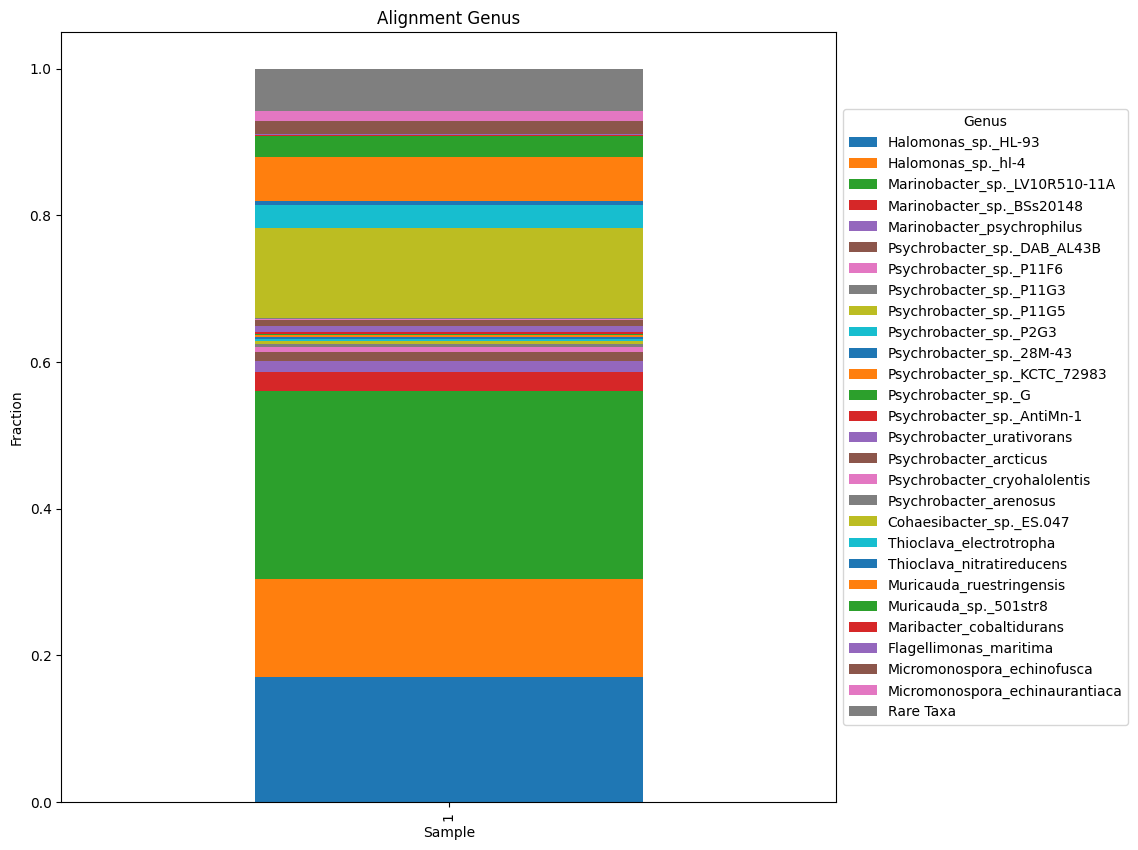

In [31]:
# Percent abundance operation.
pct = col1.apply(lambda x: x / x.sum(), axis=0)
display(pct)
pct.to_csv("pipelines/bmock12/wgsa2/fullpct_genus.csv", header=["Count"], index_label="Genus")

# Drop features with less than x percent abundance.
filtered_pct = pct.where(pct >= 0.001).dropna()

# Add other category to account for dropped samples.
filtered_pct.loc['Rare Taxa']= 1.0 - filtered_pct.sum(numeric_only=True, axis=0)
display(pct)
# pct.to_csv("pipelines/bmock12/wgsa2/0-001pct.csv")

# import matplotlib
# matplotlib.style.use('ggplot') 
filtered_pct.T.plot.bar(stacked=True, figsize=(10, 10), ylabel="Fraction", xlabel="Sample", title="Alignment Genus").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Genus")

In [41]:
indices = pct.index
cleaned_indices = [i.split("_")[0] for i in indices]
cleaned_indices = [i.replace("[" , "") for i in cleaned_indices]
cleaned_indices = [i.replace("]" , "") for i in cleaned_indices]

pct.index = cleaned_indices
pct = pct.groupby(pct.index).sum()

pct.to_csv("pipelines/bmock12/wgsa2/cleaned_pct.csv")

In [ ]:
# Sort the values by the first sample in ascending order.
pct.T
pct.sort_values(axis=0, ascending=False, by=pct.columns[0], inplace=True)

In [ ]:
# Plot with seaborn.
import plotly.express as px
fig = px.bar(pct.T, x=pct.index, y=pct.columns, title="Alignment Species", labels={'index': 'Sample', 'value': 'Fraction', "variable": "Species"})
fig.show()

In [ ]:
# Sanity check to make sure my operations are correct.

test_df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['a', 'b', 'c'])

pct_test = test_df.apply(lambda x: x / x.sum(), axis=0)
display(pct_test)

pct_test = pct_test.where(pct_test >= 0.50).dropna()
display(pct_test)

pct_test.loc['Column_Total']= 1.0 - pct_test.sum(numeric_only=True, axis=0)
display(pct_test)